## Project 4


In [5]:
import pandas as pd
import numpy as np
import keras

import sklearn.model_selection as model_selection
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [6]:
race_df = pd.read_csv('Merged_Data/merged_data.csv')
race_df.head()

/var/folders/kl/m0y8txln53774pt40hp8gplr0000gn/T/ipykernel_5035/1906195333.py:1: DtypeWarning: Columns (11,19,46) have mixed types. Specify dtype option on import or set low_memory=False.
  race_df = pd.read_csv('Merged_Data/merged_data.csv')


,Unnamed: 0,rid,course,time,date,title,rclass,band,ages,distance,...,OR,father,mother,gfather,runners,margin,weight,res_win,res_place,price
0,0,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,...,NaN,Pour Moi,Laughing Water,Duke Of Marmalade,9.0,1.199095,66.0,1.0,1.0,NaN
1,1,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,...,110.0,Getaway,Shouette,Sadler's Wells,9.0,1.199095,65.0,0.0,1.0,NaN
2,2,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,...,NaN,Vale Of York,Finnmark,Halling,9.0,1.199095,72.0,0.0,1.0,NaN
3,3,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,...,NaN,Sixties Icon,Highland Jig,Norse Dancer,9.0,1.199095,72.0,0.0,0.0,NaN
4,4,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,...,NaN,Iffraaj,Hallowed Park,Barathea,9.0,1.199095,72.0,0.0,0.0,NaN


In [7]:
# Drop unwanted columns
selected_columns = ['position', 'res_place', 'father']
race_df_selected = race_df[selected_columns]
race_df_selected

,position,res_place,father
0,1.0,1.0,Pour Moi
1,2.0,1.0,Getaway
2,3.0,1.0,Vale Of York
3,4.0,0.0,Sixties Icon
4,5.0,0.0,Iffraaj
...,...,...,...
149584,7.0,0.0,Alamosa
149585,8.0,0.0,Proisir
149586,9.0,0.0,Tavistock
149587,10.0,0.0,Per Incanto


In [8]:
race_df.index

RangeIndex(start=0, stop=149589, step=1)

In [9]:
race_df_selected.isnull().sum() #checking missing valuesposition

position     76
res_place    76
father       76
dtype: int64

In [10]:
race_df_selected.dropna(subset=['position', 'res_place', 'father'], inplace=True)


/var/folders/kl/m0y8txln53774pt40hp8gplr0000gn/T/ipykernel_5035/3611870607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_df_selected.dropna(subset=['position', 'res_place', 'father'], inplace=True)


In [11]:
race_df_selected.isnull().sum()

position     0
res_place    0
father       0
dtype: int64

In [12]:
num_rows = race_df.shape[0]
print("Number of rows:", num_rows)


Number of rows: 149589


In [13]:
race_df_selected['position'].isnull().sum()
race_df_selected['position'].value_counts()

position
1.0     14736
2.0     14731
3.0     14671
4.0     14519
5.0     14104
6.0     13277
7.0     12025
8.0     10539
9.0      8969
10.0     7389
40.0     6508
11.0     5867
12.0     4463
13.0     2948
14.0     2112
15.0     1095
16.0      728
17.0      362
18.0      233
19.0       80
20.0       56
21.0       34
22.0       25
23.0       14
24.0        8
25.0        6
26.0        4
27.0        3
28.0        1
29.0        1
30.0        1
31.0        1
32.0        1
33.0        1
34.0        1
Name: count, dtype: int64

In [14]:
race_df_selected['res_place'].isnull().sum()
race_df_selected['res_place'].value_counts()

res_place
0.0    108822
1.0     40691
Name: count, dtype: int64

In [15]:

# Group the data by 'father' and count the number of occurrences
father_counts = race_df_selected['father'].value_counts()

# Sort the fathers in descending order based on offspring count
father_counts_sorted = father_counts.sort_values(ascending=False)

# Take the top 50 fathers with the highest offspring count
top_50_fathers = father_counts_sorted.head(50)

# Print the result
print(top_50_fathers)


father
Kodiac                1764
Dark Angel            1654
Zoffany               1324
Exceed And Excel      1193
Dandy Man             1188
Lope De Vega          1154
Acclamation            983
Invincible Spirit      970
Galileo                968
Showcasing             954
Iffraaj                938
Siyouni                915
Getaway                909
Dubawi                 860
Mastercraftsman        854
Oasis Dream            846
Camelot                826
Yeats                  820
Camacho                790
Footstepsinthesand     779
Milan                  772
Stowaway               771
Bated Breath           763
Poet's Voice           760
Helmet                 740
Shamardal              729
Equiano                725
Holy Roman Emperor     721
Sea The Stars          700
Teofilo                700
Nathaniel              693
Flemensfirth           682
Presenting             680
Mayson                 679
Frankel                671
Zebedee                666
Mahler               

In [16]:
# here we are using classification model logistic regression to train the model. Variable: father Target res_place (whether they placed or not)

In [17]:
# filter fathers
father_counts = race_df['father'].value_counts()
popular_sires = father_counts.index[father_counts >= 100]
print(f'number of popular_sires: {len(popular_sires)}')
race_df = race_df[race_df['father'].isin(popular_sires)]
race_df

number of popular_sires: 350


,Unnamed: 0,rid,course,time,date,title,rclass,band,ages,distance,...,OR,father,mother,gfather,runners,margin,weight,res_win,res_place,price
0,0,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,...,NaN,Pour Moi,Laughing Water,Duke Of Marmalade,9.0,1.199095,66.0,1.0,1.0,NaN
1,1,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,...,110.0,Getaway,Shouette,Sadler's Wells,9.0,1.199095,65.0,0.0,1.0,NaN
2,2,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,...,NaN,Vale Of York,Finnmark,Halling,9.0,1.199095,72.0,0.0,1.0,NaN
3,3,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,...,NaN,Sixties Icon,Highland Jig,Norse Dancer,9.0,1.199095,72.0,0.0,0.0,NaN
4,4,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,...,NaN,Iffraaj,Hallowed Park,Barathea,9.0,1.199095,72.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149579,149579,415090,Trentham (NZ),03:45,20/12/05 00:00,Rydges Wellington Captain Cook Stakes (Group 1...,NaN,NaN,2yo+,1m,...,NaN,Savabeel,Classic Legacy,Carnegie,11.0,1.191591,57.0,0.0,1.0,11/5
149581,149581,415090,Trentham (NZ),03:45,20/12/05 00:00,Rydges Wellington Captain Cook Stakes (Group 1...,NaN,NaN,2yo+,1m,...,NaN,Reliable Man,Quality Dream,Elusive Quality,11.0,1.191591,58.0,0.0,0.0,31/10
149582,149582,415090,Trentham (NZ),03:45,20/12/05 00:00,Rydges Wellington Captain Cook Stakes (Group 1...,NaN,NaN,2yo+,1m,...,NaN,Per Incanto,City Class Rose,City On A Hill,11.0,1.191591,58.0,0.0,0.0,48/1
149586,149586,415090,Trentham (NZ),03:45,20/12/05 00:00,Rydges Wellington Captain Cook Stakes (Group 1...,NaN,NaN,2yo+,1m,...,NaN,Tavistock,Laoghaire,Pins,11.0,1.191591,58.0,0.0,0.0,217/10


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Perform one-hot encoding on the 'father' column
father_encoded = pd.get_dummies(race_df_selected['father'], prefix='father')

# Concatenate the encoded columns with the original dataframe
race_df_encoded = pd.concat([race_df_selected.drop('father', axis=1), father_encoded], axis=1)

# Select the features and target variable
X = race_df_encoded.drop('res_place', axis=1)
y = race_df_encoded['res_place']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



/Users/sunderiyabayarsaikhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9638497809584322


In [34]:
# Perform one-hot encoding on the 'father' column
father_encoded = pd.get_dummies(race_df_selected['father'], prefix='father')

# Concatenate the encoded columns with the original dataframe
race_df_encoded = pd.concat([race_df_selected.drop('father', axis=1), father_encoded], axis=1)

# Display the encoded DataFrame
print(race_df_encoded.head())


   position  res_place  father_A Giant Valentine  father_A Little Warm   
0       1.0        1.0                     False                 False  \
1       2.0        1.0                     False                 False   
2       3.0        1.0                     False                 False   
3       4.0        0.0                     False                 False   
4       5.0        0.0                     False                 False   

   father_A P Arrow  father_A. P. Answer  father_A. P. Ridge   
0             False                False               False  \
1             False                False               False   
2             False                False               False   
3             False                False               False   
4             False                False               False   

   father_A. P. Warrior  father_A.P. Delta  father_Abajo  ...  father_Zebedee   
0                 False              False         False  ...           False  \
1       

Confusion Matrix:
[[20785   871]
 [  210  8037]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97     21656
         1.0       0.90      0.97      0.94      8247

    accuracy                           0.96     29903
   macro avg       0.95      0.97      0.96     29903
weighted avg       0.97      0.96      0.96     29903



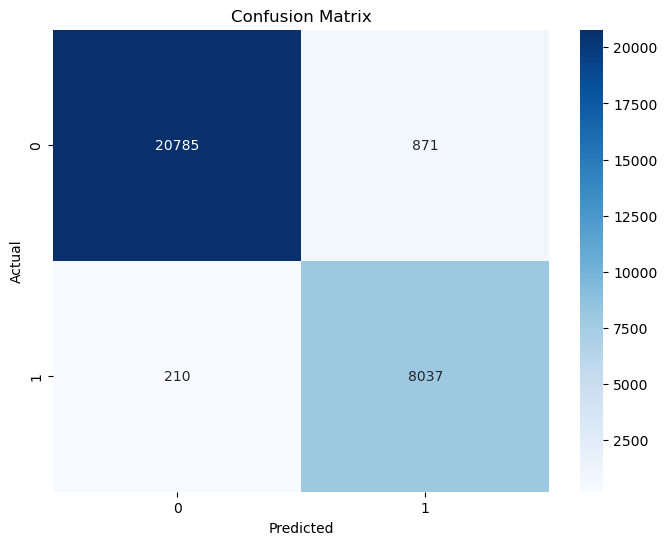

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a classification report
report = classification_report(y_test, y_pred)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



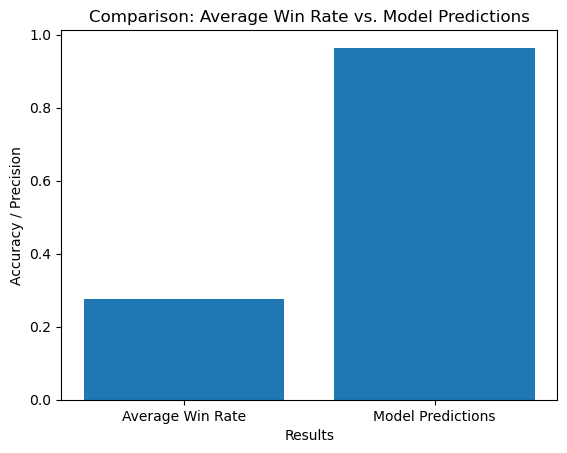

In [20]:
# Calculate the average win rate
average_win_rate = y_test.mean()

# Calculate the precision of the model predictions
precision = accuracy

# Plotting the results
labels = ['Average Win Rate', 'Model Predictions']
values = [average_win_rate, precision]

plt.bar(labels, values)
plt.xlabel('Results')
plt.ylabel('Accuracy / Precision')
plt.title('Comparison: Average Win Rate vs. Model Predictions')
plt.show()


In [21]:

# Combine y_test and y_pred into a DataFrame
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions.csv', index=False)


Feature importance analysis for the logistic regression to see which features have the most influence on the predictions

father_Daiwa Major', 'father_Screen Hero', and 'father_Deep Impact' features are the most influential positive features, as they have relatively large positive coefficients

In [27]:
# Get the feature coefficients from the trained logistic regression model
feature_importance = model.coef_[0]

# Create a DataFrame to store the feature names and their corresponding coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': feature_importance})

# Sort the DataFrame by absolute coefficient values in descending order
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Display the feature importances
print("Feature Importances:")
print(coef_df)


Feature Importances:
                    Feature  Coefficient
0                  position    -3.560428
551      father_Daiwa Major     2.126464
2108     father_Screen Hero     2.034203
590      father_Deep Impact     1.876714
2050       father_Rulership     1.736319
...                     ...          ...
776           father_Etched     0.000000
773      father_Espoir City     0.000000
1867       father_Pool Play     0.000000
767          father_Erewhon     0.000000
835   father_Filoso Emperor     0.000000

[2760 rows x 2 columns]


Incorrectly Predicted Samples:
        Actual  Predicted  Correct
6832       0.0          1    False
113131     0.0          1    False
140137     0.0          1    False
61718      0.0          1    False
21455      0.0          1    False
...        ...        ...      ...
75034      0.0          1    False
75113      0.0          1    False
55338      0.0          1    False
134494     0.0          1    False
76052      0.0          1    False

[1081 rows x 3 columns]


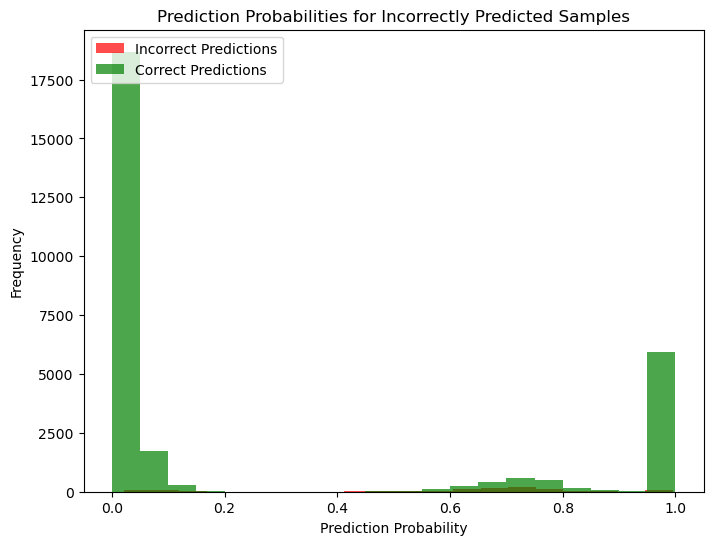

In [26]:
# Get the predicted probabilities for the positive class (class 1)
y_probs = model.predict_proba(X_test)[:, 1]

# Convert predicted probabilities to binary predictions based on a threshold
threshold = 0.5
y_pred_binary = np.where(y_probs >= threshold, 1, 0)

# Create a DataFrame with the actual and predicted values
error_analysis_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_binary})

# Add a column to indicate correct or incorrect predictions
error_analysis_df['Correct'] = error_analysis_df['Actual'] == error_analysis_df['Predicted']

# Filter rows where predictions are incorrect
incorrect_predictions = error_analysis_df[error_analysis_df['Correct'] == False]

# Optionally, display the incorrectly predicted samples
print("Incorrectly Predicted Samples:")
print(incorrect_predictions)

# Plot a histogram of the model's prediction probabilities for incorrectly predicted samples
plt.figure(figsize=(8, 6))
plt.hist(y_probs[error_analysis_df['Correct'] == False], bins=20, alpha=0.7, color='red', label='Incorrect Predictions')
plt.hist(y_probs[error_analysis_df['Correct'] == True], bins=20, alpha=0.7, color='green', label='Correct Predictions')
plt.xlabel('Prediction Probability')
plt.ylabel('Frequency')
plt.title('Prediction Probabilities for Incorrectly Predicted Samples')
plt.legend(loc='upper left')
plt.show()
